### Step 1: Import necessary libraries

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

### Step 2: Load the dataset from the URL

In [21]:
df = pd.read_csv('50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### Step 3: Preprocess the data


In [22]:
label_encoder = LabelEncoder()
df['State'] = label_encoder.fit_transform(df['State'])
df_encoded = pd.get_dummies(df, columns=['State'], drop_first=True)

# Split features and target
X = df_encoded.drop('Profit', axis=1)
y = df_encoded['Profit']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Step 4: Train Lasso linear regression model with different numbers of variables

In [24]:
results = []
models = []  # Store all models

for num_features in range(1, X_train.shape[1] + 1):
    model = Lasso(alpha=1.0)  # You can adjust the alpha value as needed
    model.fit(X_train.iloc[:, :num_features], y_train)
    y_pred = model.predict(X_test.iloc[:, :num_features])
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append((num_features, X_train.columns[:num_features].tolist(), mse, mae, r2))
    models.append(model)

# Create a DataFrame to display the results
result_df = pd.DataFrame(results, columns=['Num Features', 'Selected Features', 'MSE', 'MAE', 'R2'])

best_model_index = result_df['MSE'].idxmin()

# Step 5: Make predictions on testing data and calculate MSE for the best model
best_model = models[best_model_index]
best_num_features = result_df.loc[best_model_index, 'Num Features']
best_features = result_df.loc[best_model_index, 'Selected Features']
best_mse = result_df.loc[best_model_index, 'MSE']
best_mae = result_df.loc[best_model_index, 'MAE']
best_r2 = result_df.loc[best_model_index, 'R2']

print("Results for Different Numbers of Variables:")
print(result_df)

print("\nBest Model (Minimum MSE):")
print(f"Number of Features: {best_num_features}")
print(f"Selected Features: {best_features}")
print(f"Best MSE: {best_mse:.2f}")
print(f"Best MAE: {best_mae:.2f}")
print(f"Best R2: {best_r2:.2f}")

Results for Different Numbers of Variables:
   Num Features                                  Selected Features  \
0             1                                        [R&D Spend]   
1             2                        [R&D Spend, Administration]   
2             3       [R&D Spend, Administration, Marketing Spend]   
3             4  [R&D Spend, Administration, Marketing Spend, S...   
4             5  [R&D Spend, Administration, Marketing Spend, S...   

            MSE          MAE        R2  
0  5.951096e+07  6077.363303  0.926511  
1  8.376413e+07  7181.327116  0.896561  
2  8.092632e+07  6979.152235  0.900065  
3  8.200420e+07  6961.574688  0.898734  
4  8.200420e+07  6961.574688  0.898734  

Best Model (Minimum MSE):
Number of Features: 1
Selected Features: ['R&D Spend']
Best MSE: 59510962.82
Best MAE: 6077.36
Best R2: 0.93


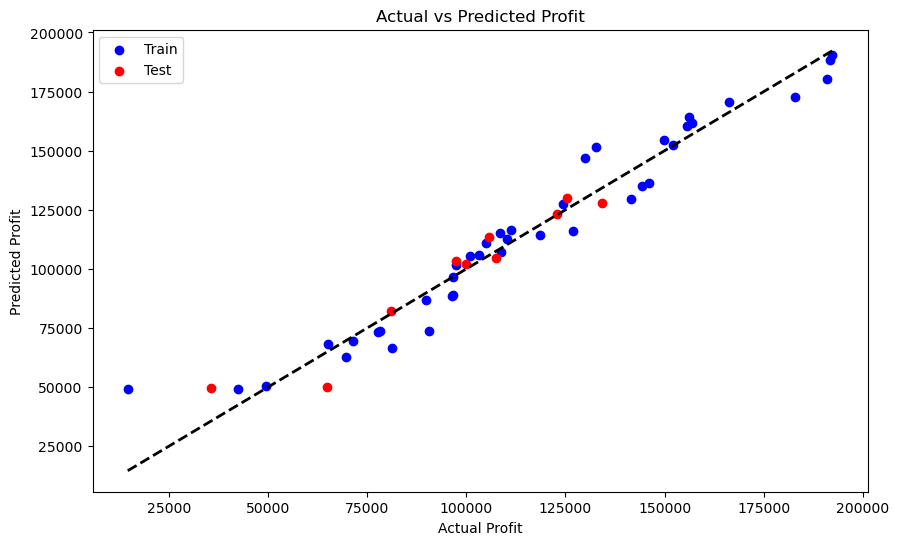

In [25]:
# Plot training and test curves
plt.figure(figsize=(10, 6))
plt.scatter(y_train, best_model.predict(X_train.iloc[:, :best_num_features]), color='blue', label='Train')
plt.scatter(y_test, best_model.predict(X_test.iloc[:, :best_num_features]), color='red', label='Test')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Profit')
plt.ylabel('Predicted Profit')
plt.title('Actual vs Predicted Profit')
plt.legend()
plt.show()